### Analysis_3
Analyze the quantity and percentage of each movie genre in every year from 1995-2015. <br>
If one movie has more than one genre, then each genre add one count. <br>
Show comparision in matpolotlib graphs.<br>

In [1]:
import os
import pandas as pd
import numpy as np
from pandas import DataFrame as df
from datetime import datetime
import time
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
rootdir = os.path.expanduser('~')+'/final/data/ml-20m-dataset'

In [3]:
ratings = pd.read_csv(rootdir+'/ratings.csv')
movies = pd.read_csv(rootdir+'/movies.csv')

In [4]:
movies['year'] = movies['title'].apply(lambda x: x[-5:-1])

In [5]:
movies = movies[movies['year'].apply(lambda x: True if x.isdigit() else False)]

In [6]:
movies.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


**Get all movie genres**

In [7]:
genres_list = []

In [8]:
def get_genre(genres):
    [genres_list.append(x) for x in genres.split("|")]

In [9]:
movies['genres'].apply(get_genre).head(2)

0    None
1    None
Name: genres, dtype: object

In [10]:
len(set(genres_list))

20

In [11]:
set(genres_list)

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [12]:
movies['title'][movies['genres']=='(no genres listed)'].count()

237

**Although it's recommend not to use for loop in pandas, however, this solution is the easiest and neatest way I found to add columns to original movie dataset**

In [13]:
movies_1 = movies.copy()

In [14]:
for x in set(genres_list):
    movies_1[x] = movies_1['genres'].apply(lambda y: x in y)

In [15]:
movies_1.head(5)

,movieId,title,genres,year,Film-Noir,Comedy,Animation,Western,Sci-Fi,Drama,...,Musical,IMAX,Thriller,Romance,Fantasy,Mystery,Horror,War,(no genres listed),Documentary
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,1995,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Fitler and clean up data - only keep year and new added genre columns after 1995.<br>**
**Also add a total column to sum up all genres. This total number is different than the total number of movies in the year.**

In [16]:
movies_2 = movies_1.drop(movies_1.columns[[0,1,2]],axis=1).groupby('year').sum().reset_index()

In [17]:
movies_2.head(3)

,year,Film-Noir,Comedy,Animation,Western,Sci-Fi,Drama,Children,Adventure,Crime,...,Musical,IMAX,Thriller,Romance,Fantasy,Mystery,Horror,War,(no genres listed),Documentary
0,1891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
movies_2 = movies_2[movies_2['year'].astype(int)>=1995].reset_index()

In [19]:
movies_2.head(3)

,index,year,Film-Noir,Comedy,Animation,Western,Sci-Fi,Drama,Children,Adventure,...,Musical,IMAX,Thriller,Romance,Fantasy,Mystery,Horror,War,(no genres listed),Documentary
0,97,1995,1.0,133.0,17.0,9.0,31.0,236.0,37.0,44.0,...,9.0,4.0,69.0,71.0,23.0,27.0,34.0,20.0,3.0,31.0
1,98,1996,1.0,186.0,16.0,6.0,30.0,247.0,26.0,42.0,...,12.0,0.0,84.0,82.0,16.0,15.0,32.0,11.0,3.0,35.0
2,99,1997,5.0,173.0,17.0,3.0,32.0,262.0,36.0,40.0,...,15.0,3.0,94.0,85.0,30.0,28.0,26.0,14.0,4.0,37.0


In [20]:
movies_2['total'] = movies_2.T.apply(lambda x: np.sum(x[2:].astype(int).values))

In [21]:
movies_2.head(4)

,index,year,Film-Noir,Comedy,Animation,Western,Sci-Fi,Drama,Children,Adventure,...,IMAX,Thriller,Romance,Fantasy,Mystery,Horror,War,(no genres listed),Documentary,total
0,97,1995,1.0,133.0,17.0,9.0,31.0,236.0,37.0,44.0,...,4.0,69.0,71.0,23.0,27.0,34.0,20.0,3.0,31.0,927
1,98,1996,1.0,186.0,16.0,6.0,30.0,247.0,26.0,42.0,...,0.0,84.0,82.0,16.0,15.0,32.0,11.0,3.0,35.0,959
2,99,1997,5.0,173.0,17.0,3.0,32.0,262.0,36.0,40.0,...,3.0,94.0,85.0,30.0,28.0,26.0,14.0,4.0,37.0,1038
3,100,1998,2.0,191.0,26.0,3.0,38.0,282.0,37.0,41.0,...,3.0,94.0,102.0,30.0,25.0,33.0,18.0,6.0,40.0,1124


In [22]:
movies_2.ix[1]

index                   98
year                  1996
Film-Noir                1
Comedy                 186
Animation               16
Western                  6
Sci-Fi                  30
Drama                  247
Children                26
Adventure               42
Crime                   53
Action                  62
Musical                 12
IMAX                     0
Thriller                84
Romance                 82
Fantasy                 16
Mystery                 15
Horror                  32
War                     11
(no genres listed)       3
Documentary             35
total                  959
Name: 1, dtype: object

**Add percentage column for each genre**<br>
Use a movies_2_copy just in case something goes wrong and I don't have to run everything from beginning again

In [23]:
def setPercentage(sr):
    movies_2_copy[sr.name+'_percentage'] = sr/movies_2_copy['total']

In [24]:
movies_2_copy = movies_2.copy()

In [25]:
movies_2_copy = movies_2_copy.drop(movies_2_copy.columns[[0,1]],axis=1)

In [26]:
for x in movies_2_copy:
    movies_2_copy[x+'_percentage'] = movies_2_copy[x]/movies_2_copy['total'] * 100

In [27]:
movies_2_copy

,Film-Noir,Comedy,Animation,Western,Sci-Fi,Drama,Children,Adventure,Crime,Action,...,IMAX_percentage,Thriller_percentage,Romance_percentage,Fantasy_percentage,Mystery_percentage,Horror_percentage,War_percentage,(no genres listed)_percentage,Documentary_percentage,total_percentage
0,1.0,133.0,17.0,9.0,31.0,236.0,37.0,44.0,53.0,75.0,...,0.431499,7.443366,7.659115,2.481122,2.912621,3.667745,2.157497,0.323625,3.344121,100.0
1,1.0,186.0,16.0,6.0,30.0,247.0,26.0,42.0,53.0,62.0,...,0.000000,8.759124,8.550574,1.668405,1.564129,3.336809,1.147028,0.312826,3.649635,100.0
2,5.0,173.0,17.0,3.0,32.0,262.0,36.0,40.0,61.0,73.0,...,0.289017,9.055877,8.188825,2.890173,2.697495,2.504817,1.348748,0.385356,3.564547,100.0
3,2.0,191.0,26.0,3.0,38.0,282.0,37.0,41.0,69.0,69.0,...,0.266904,8.362989,9.074733,2.669039,2.224199,2.935943,1.601423,0.533808,3.558719,100.0
4,1.0,197.0,21.0,3.0,30.0,259.0,22.0,31.0,46.0,59.0,...,0.395257,8.992095,8.399209,2.667984,2.470356,4.347826,0.889328,0.395257,4.644269,100.0
5,0.0,223.0,27.0,5.0,30.0,325.0,25.0,34.0,66.0,62.0,...,0.083682,8.870293,8.870293,2.343096,2.008368,4.518828,1.087866,0.251046,4.184100,100.0
6,1.0,221.0,27.0,4.0,29.0,335.0,22.0,40.0,65.0,89.0,...,0.234558,7.740422,9.147772,2.892885,3.127443,3.909304,2.111024,0.078186,4.222048,100.0
7,0.0,219.0,32.0,3.0,44.0,362.0,35.0,52.0,96.0,91.0,...,0.142146,8.813077,8.528785,2.061123,2.985075,3.340441,1.776830,0.355366,4.335466,100.0
8,2.0,240.0,29.0,7.0,37.0,336.0,40.0,50.0,89.0,106.0,...,0.279916,8.607418,7.627712,2.309307,2.869139,4.408677,1.609517,0.069979,5.248425,100.0
9,0.0,231.0,35.0,6.0,44.0,364.0,29.0,71.0,72.0,110.0,...,0.200669,7.892977,7.224080,3.545151,2.809365,4.280936,1.872910,0.468227,6.020067,100.0


In [28]:
movies_2_copy.columns[:21]

Index(['Film-Noir', 'Comedy', 'Animation', 'Western', 'Sci-Fi', 'Drama',
       'Children', 'Adventure', 'Crime', 'Action', 'Musical', 'IMAX',
       'Thriller', 'Romance', 'Fantasy', 'Mystery', 'Horror', 'War',
       '(no genres listed)', 'Documentary', 'total'],
      dtype='object')

In [29]:
movies_2_copy.columns[21:]

Index(['Film-Noir_percentage', 'Comedy_percentage', 'Animation_percentage',
       'Western_percentage', 'Sci-Fi_percentage', 'Drama_percentage',
       'Children_percentage', 'Adventure_percentage', 'Crime_percentage',
       'Action_percentage', 'Musical_percentage', 'IMAX_percentage',
       'Thriller_percentage', 'Romance_percentage', 'Fantasy_percentage',
       'Mystery_percentage', 'Horror_percentage', 'War_percentage',
       '(no genres listed)_percentage', 'Documentary_percentage',
       'total_percentage'],
      dtype='object')

**Draw Graphs**

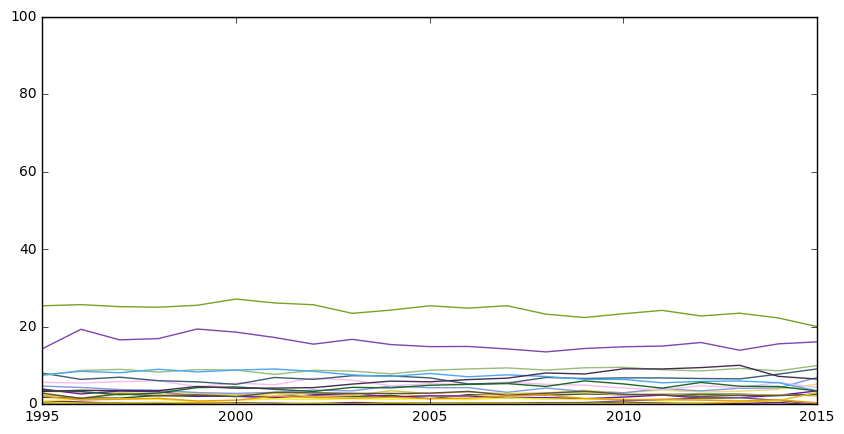

In [30]:
plt.figure(figsize=(10,5))
year = movies_2['year']
for x in movies_2_copy.columns[21:]:
    data = movies_2_copy[x]
    plt.plot(year, data, color=np.random.rand(3,),alpha=1)

plt.show()

In [31]:
series_year = movies_2['year']

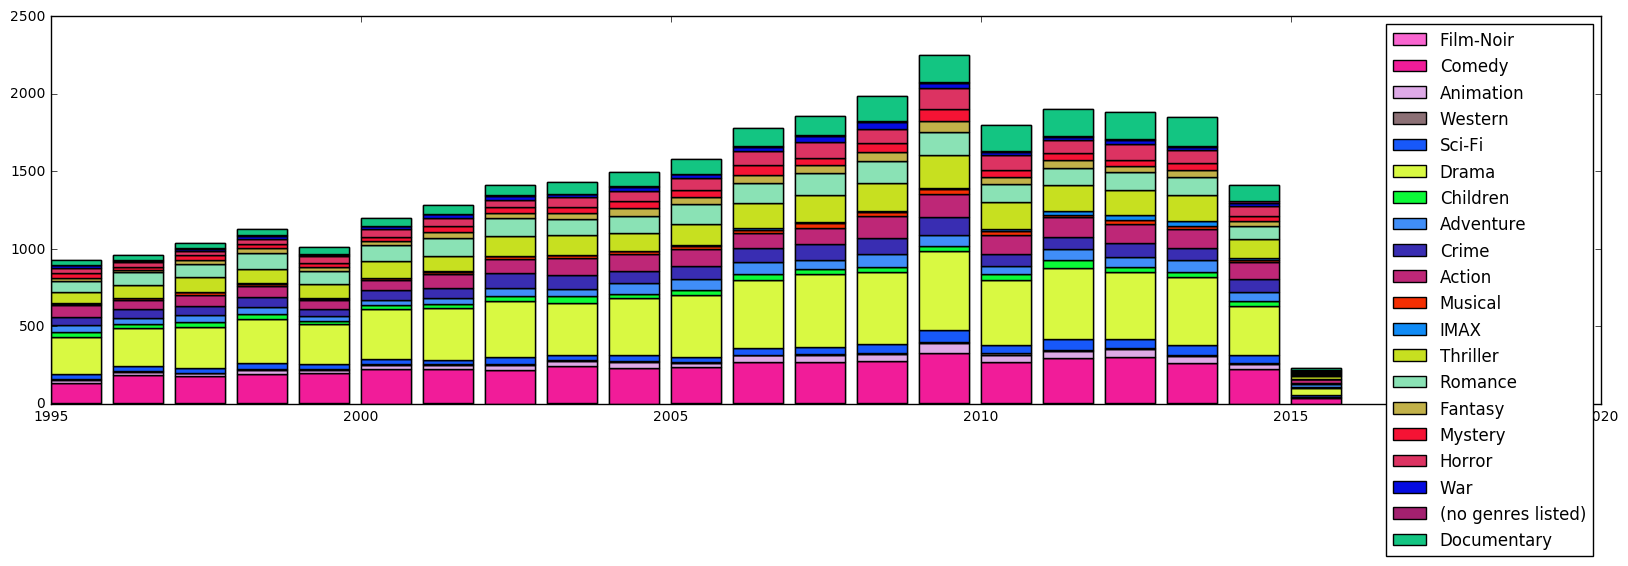

In [32]:
plt.figure(figsize=(20,5))
a = 0
p_list = []
genre_list = []
for genre in movies_2_copy.columns[:20]:
    genre_color=np.random.rand(3,)
    if a==0:
        p0 = plt.bar(series_year, movies_2_copy[genre], color=genre_color)
        p_list.append(p0)
        genre_list.append(genre)
    else:
        plt.bar(series_year, movies_2_copy[genre], bottom= movies_2_copy[movies_2_copy.columns[:a]].T.sum(), color=genre_color)
        p_list.append(plt.bar(series_year, movies_2_copy[genre], bottom= movies_2_copy[movies_2_copy.columns[:a]].T.sum(), color=genre_color))
        genre_list.append(genre)
    a = a + 1
    
plt.legend(p_list, genre_list) 
plt.show()

This result is interesting...I did not expect Drama and Comedy to be most popular genres and even the quantity of documentary keeps increasing. I'll use a multiple bar char to demonstrate the quantity difference of Drama, Comedy and Documentary in these 20 years.

In [33]:
series_drama = movies_2_copy['Drama']
series_comedy = movies_2_copy['Comedy']
series_documentary = movies_2_copy['Documentary']

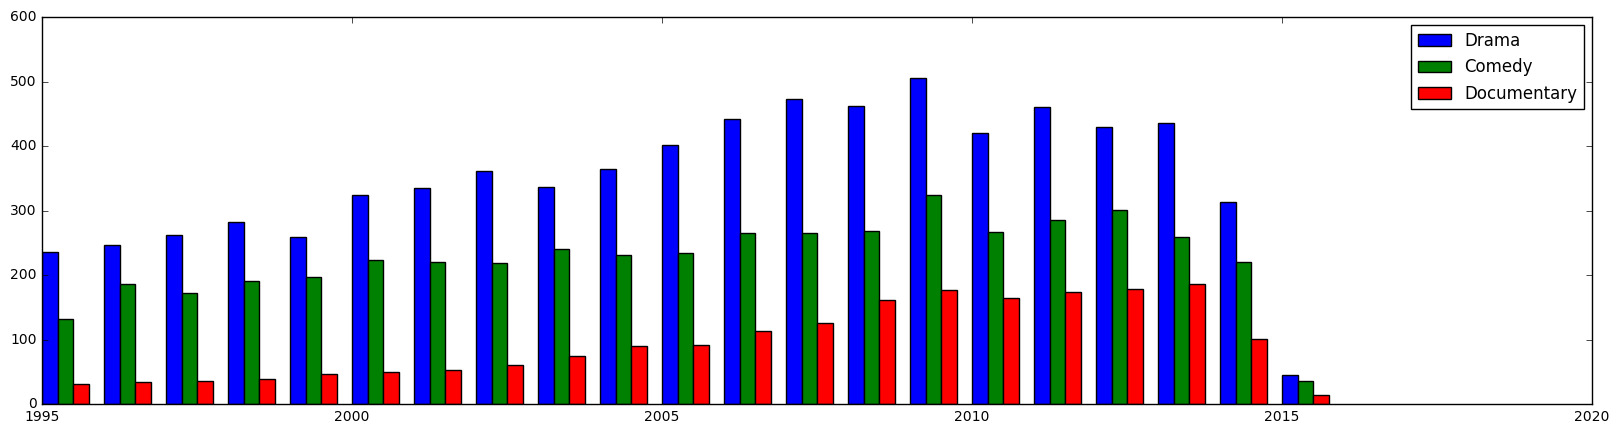

In [34]:
plt.figure(figsize=(20,5))
p1 = plt.bar(series_year, series_drama, color = 'b', width = 0.25)
p2 = plt.bar(series_year.astype(float)+0.25, series_comedy, color = 'g', width = 0.25)
p3 = plt.bar(series_year.astype(float)+0.5, series_documentary, color = 'r', width = 0.25)

plt.legend([p1,p2,p3], ['Drama','Comedy','Documentary']) 
plt.show()

Incredible finding...